In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
data = pd.read_csv("Concrete_Data_Yeh.csv")

## Data explantion

In [3]:
print(data.columns.values)

['cement' 'slag' 'flyash' 'water' 'superplasticizer' 'coarseaggregate'
 'fineaggregate' 'age' 'csMPa']


## columns
https://www.kaggle.com/maajdl/yeh-concret-data/downloads/yeh-concret-data.zip/1
Cement (component 1) -- quantitative - Input Variable 
Blast Furnace Slag (component 2) -- quantitative - Input Variable 
https://en.wikipedia.org/wiki/Ground_granulated_blast-furnace_slag
Fly Ash (component 3) -- quantitative - Input Variable - ash from coal burining
https://en.wikipedia.org/wiki/Fly_ash
Water (component 4) -- quantitative - Input Variable 
Superplasticizer (component 5) -- quantitative - Input Variable - allows for less water use
https://en.wikipedia.org/wiki/Superplasticizer
Coarse Aggregate (component 6) -- quantitative -- Input Variable - (filler) adds strength and reinforcement 
Fine Aggregate (component 7) -- quantitative -- Input Variable - (filler) fills the gap between concrte and coarse aggregate
Age -- quantitative -- Day (1~365) -- Input Variable 
Concrete compressive strength -- quantitative -- MPa -- Output Variable

## Data exploration

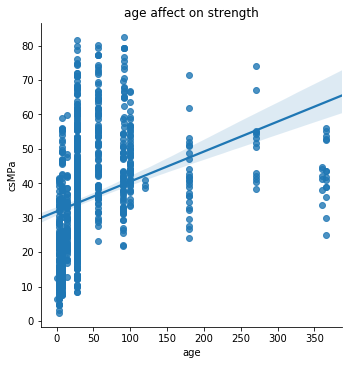

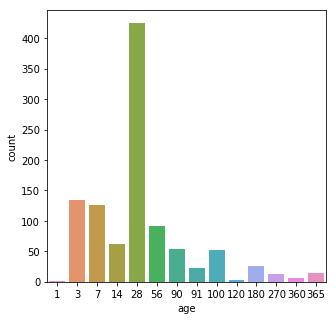

In [44]:
sns.lmplot(data=data,x='age',y='csMPa')
plt.title("age affect on strength")
f, axes = plt.subplots(1, 1)
sns.countplot(data=data, x='age',ax=axes)

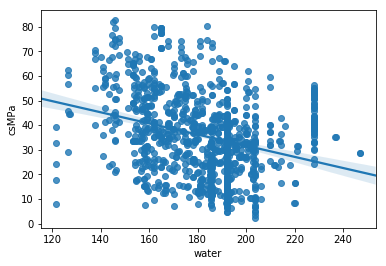

In [5]:
sns.regplot(data=data,x='water',y='csMPa')

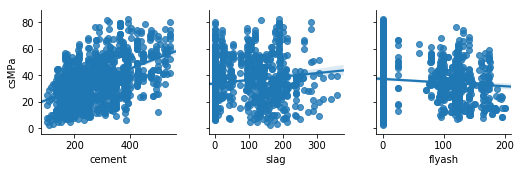

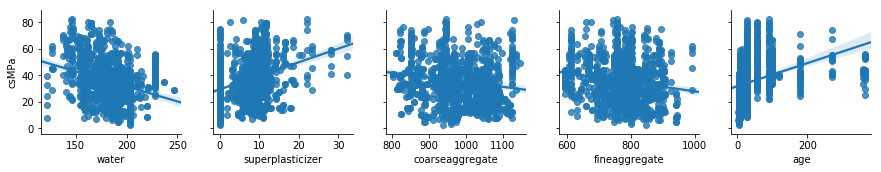

In [6]:
plt.rcParams['figure.figsize']=(5,5)
sns.pairplot(data=data ,y_vars=['csMPa'], x_vars=['cement' ,'slag', 'flyash'],kind='reg')
g = sns.pairplot(data=data ,y_vars=['csMPa'], x_vars=['water', 'superplasticizer', 'coarseaggregate'
, 'fineaggregate', 'age' ],kind='reg')

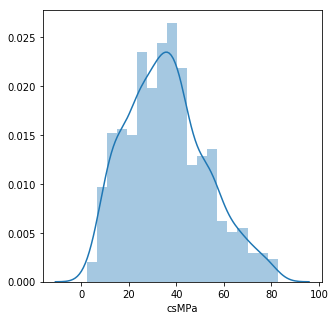

In [7]:
sns.distplot(data['csMPa'])

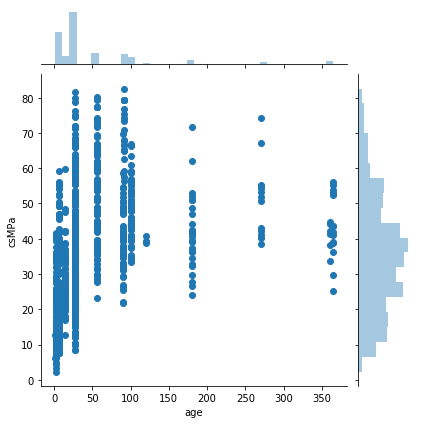

In [12]:
sns.jointplot(data=data,x='age',y='csMPa')

## Models 

In [17]:
from sklearn.dummy import DummyRegressor
x = data.drop('csMPa',axis=1).copy()
y = data['csMPa'].copy()
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(data.drop('csMPa',axis=1), data['csMPa'], test_size=0.2, random_state=1)
dummy = DummyRegressor(strategy = 'mean')
print(np.sqrt(-cross_val_score(dummy, x, y, cv=10, scoring='neg_mean_squared_error')).mean())

16.582072494316023


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(np.sqrt(-cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error')).mean())

11.131973208935257


In [19]:
from sklearn.linear_model import Ridge
rg = Ridge()
print(np.sqrt(-cross_val_score(rg, x, y, cv=10, scoring='neg_mean_squared_error')).mean())

11.13196917839611


In [30]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
print(np.sqrt(-cross_val_score(regr, x, y, cv=10, scoring='neg_mean_squared_error')).mean())

12.160545713850283


Text(0, 0.5, 'cv mean error')

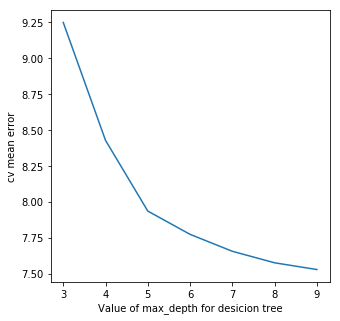

In [39]:
from sklearn.ensemble import AdaBoostRegressor
d_range = list(range(3, 10))
d_scores = []
for d in d_range:
    ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=d))
    d_scores.append(np.sqrt(-cross_val_score(ada, x, y, cv=10, scoring='neg_mean_squared_error')).mean())


plt.plot(d_range, d_scores)
plt.xlabel('Value of max_depth for desicion tree')
plt.ylabel('cv mean error')